# First assignment
The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1), 1.2), 1.3), 1.4), 1.5), 2.1), 2.2), 2.3), 2.4), 2.5*), 2.6*), 2.7*). After each task description there is an answer cell for your code or text. For coding tasks they look like this:

```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the ami23-assignments folder or subfolders.
- Do not override the original files in the ami23-assignments folder or subfolders.
- For every plot makes sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted. 

#### Date of submission: May 04th, 2023, 23:55 hrs

You will be using the "Forest Fires" dataset to perform basic preprocessing steps and learn about validation techniques to build a classification model.
If you are not familiar with the abbreviations for the weather data, have a look at this source:
https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system

In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("forestfires.csv")

print(data.info())

cat_features = data.dtypes[data.dtypes == "object"].index.values

print(f'\nThe dataset contains the following categorical features: {cat_features}.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    514 non-null    float64
 5   DMC     515 non-null    float64
 6   DC      515 non-null    float64
 7   ISI     516 non-null    float64
 8   temp    517 non-null    float64
 9   RH      516 non-null    float64
 10  wind    516 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB
None

The dataset contains the following categorical features: ['month' 'day'].


### Task 1.1
Perform a train-test-split on the dataset with `area` as variable of interest, `test_size=0.3` and `random_seed=42`; use the variable names `X_train`, `X_test`, `y_train`, `y_test`.

*Hint: Ensure that the data is still a Pandas dataframe!*

In [4]:
# YOUR CODE HERE


### Task 1.2
As you might have realized there are categorical features present in the data. Now you have the choice between two different encoding methods: *ordinal* and *one-hot*. Use one of them for the column `month` and the column `day`. Set up a `ColumnTransformer()` object with the name `ct` and transform the categorical features using `OrdinalEncoder()` (named `'ordinal'`) or `OneHotEncoder()` (named `'one-hot'`).
<br>For easier (though less efficient) further processing set the agrument `sparse=False` for the one-hot coder, if you use it, further use the setting `drop='first'`. For both encoders use the `categories` parameter with the lists given below for months and days.

In [5]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
days = ['mon', 'tue','wed', 'thu','fri', 'sat', 'sun']

# YOUR CODE HERE


### Task 1.3
Now transform the categorical features using your encoder from task 1.2! Use the name `X_train_encoded` and `X_test_encoded`for the transformed data. 

*Hint: Create a copy of your data, before you use the encoder! Ensure that the data is still a Pandas dataframe!*

In [6]:
# YOUR CODE HERE


### Task 1.4
Determine whether there are missing values in the train dataset. If so, use the kNN approach suggested by Kuhn & Johnson for imputation. Use sklearn's `KNNImputer()` with $k = 3$. Name your imputer object `imp`. Use the imputer  to transform your variables `X_train_encoded` and `X_test_encoded`. Name the new variables `X_train_imputed` and `X_test_imputed`!

*Hint: Create a copy of your data, before you use the imputer! Ensure that the data is still a Pandas dataframe!*

In [7]:
# YOUR CODE HERE


### Task 1.5
Implement a `StandardScaler` for the columns `X`, `Y`, `FFMC`, `DMC`, `DC`, `ISI`, `temp`, `RH`, `wind`, `rain` and the ordinal encoded features from 1.2 in case you have ordinal encoded features. Use the variable name `sc` for the `StandardScaler` object and name your variables `X_train_sc` and `X_test_sc` to indicate that the data was scaled.

*Hint: Create a copy of your data befor you use the scaler! Ensure that the data is still a Pandas dataframe!*

In [8]:
# YOUR CODE HERE


### Task 2.1
The following tasks are about validation. At first, we need to decide for a model family. Use 5-fold-cross-validation to find a suitable model family out of the following (all with default settings, you can tune your model later):
- linear regression (name it `lr`)
- random forests (name it `rf`; will be ironic if this is the choice for a "forest fire" dataset)
- decision tree (name it `dt`)
- support vector regression (name it `svr`)

<!-- -->

Evaluate the performance of the models using the mean squared error.

Use `random_state=42` in your cross validation object and `shuffle=True`, name it `kfold`. If you use encoder, imputer and/or scaler, name them `ct_cv`, `imp_cv` and `sc_cv`, respectively.

Store the results for your models in the lists `cv_results_mean` and `cv_results_std`. The lists should contain the mean and the standard deviation of the four models across the 5 folds, i.e. each list should contain 4 values. Use the original data.

*Hint: Be sure to implement the cross validation correctly. What should you do before training with the k-1 (so 4 in this case) folds?*

In [9]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

K = 5

models = [
    ("lr", LinearRegression()),
    ("rf", RandomForestRegressor()),
    ("dt", DecisionTreeRegressor()),
    ("svr", SVR())
]

# Instanciate the kfold object and possible column_transformers, imputers, and scalers here
# YOUR CODE HERE



cv_results_mean = []
cv_results_std = []

for name, model in models:
    mse = []
    for train_index, validation_index in kfold.split(X_train):
        #YOUR CODE HERE
        

        
print('mean CV error for each model: \n', cv_results_mean)
print('std CV error for each model:\n', cv_results_std)

mean CV error for each model: 
 [7.8407845927124655e+28, 2814.255846996659, 3057.7303076084863, 2479.7766292106667]
std CV error for each model:
 [1.5681569185424931e+29, 3576.706541829784, 3565.53999758081, 3770.832224948748]


### Task 2.2
One thing we have not looked at is if there is skewness in our data. Use a histogram to visualize the burned area (`y_train`).

Additionally, you can also have a look at our other features (voluntarily)

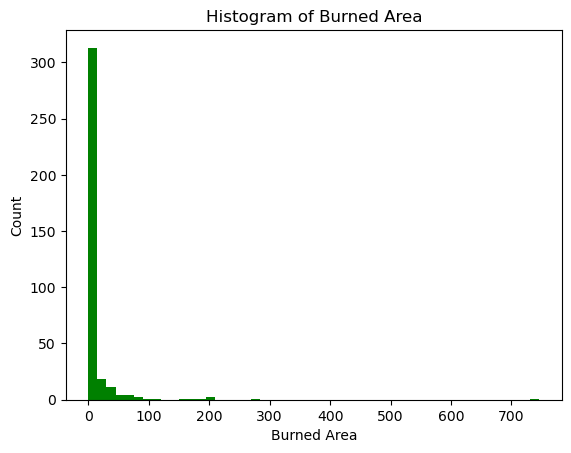

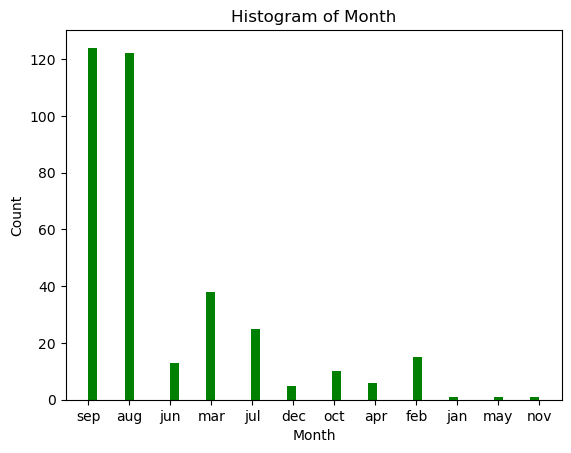

In [10]:
# YOUR CODE HERE


### Task 2.3

For skewed data we can use a logarithm transform $x_{transformed} = ln(x + 1)$. Use a `FunctionTransformer` to transform `y_train`. Name your variable `y_train_tf`.

In [11]:
# YOUR CODE HERE


### Task 2.4
Repeat task 2.1 with your transformed target variable `y_train_tf`. What do you observe? Store the results in `cv_results_mean_tf` and `cv_results_std_tf`.

In [17]:
K = 5

models = [
    ("lr", LinearRegression()),
    ("rf", RandomForestRegressor()),
    ("dt", DecisionTreeRegressor()),
    ("svr", SVR())
]

# Instanciate the kfold object and possible column_transformers, imputers, and scalers here
# YOUR CODE HERE



cv_results_mean_tf = []
cv_results_std_tf = []

for name, model in models:
    mse = []
    for train_index, validation_index in kfold.split(X_train):
        # YOUR CODE HERE
        
        
        
print('mean CV error for each model: \n', cv_results_mean_tf)
print('std CV error for each model: \n', cv_results_std_tf)

mean CV error for each model: 
 [9.835533231910329e+25, 2.2205656015226896, 2.3791966024847384, 2.451028658485101]
std CV error for each model: 
 [1.9671066463820657e+26, 0.5517549535626433, 0.6155285995807709, 0.5104152490285708]


Mean squared error of our models will decrease after applying the logarithm transformation.

What you learned in this assignment is how to use basic preprocessing, feature selection techniques and how to perform a cross-validation. However, the forest fire dataset is a complex dataset and we still used only the default configurations of our models.<br>

**The last tasks (2.5 - 2.7) are not mandatory!**<br>
The points that you can collect there will be added to your total point count. If you mess up other tasks, it might come in handy in the end :)

As you noticed, setting up all the pre-processing steps can get quite complex. To ease this process and make it more re-usable, sklearn provides the cool concept of pipelines, which you can use in the following tasks.

Here are some useful links on sklearn's pipelines:
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- https://towardsdatascience.com/step-by-step-tutorial-of-sci-kit-learn-pipeline-62402d5629b6
- https://medium.com/@gustavorsantos/a-basic-introduction-to-pipelines-in-scikit-learn-bd4cee34ad95?source=email-11ed8409e3e9-1682211838023-digest.reader-7f60cf5620c9-bd4cee34ad95----0-59------------------39e746ff_2651_496e_bba6_d94bd9e065bf-1

### Task 2.5* BONUS
Decide for one of the previous 4 models. 
To find the (hopefully) best parameters, perform a grid search using `GridSearchCV` for your chosen model and store it in the variable `gs_cv`. Decide for a meaningful parameter grid yourself. Use `scoring='neg_mean_squared_error'`.

<br>Because you share the resources with other students, we need to constrain your GridSearch a little bit: Be economical with the parameters. For instance, if you train a SVR, choose only 2 kernels and a total of 8 other parameters.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# perform the GridSearch here
# YOUR CODE HERE


print("Best hyperparameters:", gs_cv.best_params_)
print("Best score:", gs_cv.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

### Task 2.6* BONUS
Instanciate your final model with the best parameters and store it in the variable `final_model`. Fit it on the `X_train_sc` dataset from task 1 and `y_train`. Then calculate the MSE on the test set by using `X_test_sc` and `y_test` and store the MSE value to the variable `final_mse`!

In [ ]:
# define the model you choose based on your gridsearch here and fit the model with the whole training set.
final_model = #model here
# YOUR CODE HERE
print(final_mse)

### Task 2.7* BONUS
Why did we instruct you to use the `drop='first'` setting for the one-hot encoder in task 1.2? Take into your consideration the list of models from task 2!

YOUR ANSWER HERE